<a href="https://colab.research.google.com/github/psshri/Practise/blob/master/DL/TensorFlow_2_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
a = tf.Variable(3.0, tf.float32)
b = tf.Variable(3.0, tf.float32)
x = tf.placeholder(tf.float32)

In [0]:
w = a*x + b

In [0]:
sess = tf.Session()

In [0]:
init = tf.global_variables_initializer()

In [0]:
sess.run(init)

In [0]:
y = tf.placeholder(tf.float32)

In [0]:
loss = tf.square(w-y)

In [0]:
loss = tf.reduce_sum(loss)

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

In [0]:
for i in range(10000):
  sess.run(train, {x:[1,2,3], y:[1,2,3]})

In [47]:
sess.run([a,b])

[0.9999993, 1.4885993e-06]

**Implementaton of NMI use case**

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [48]:
from zipfile import ZipFile
file_name = "mines-vs-rocks.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [0]:
df = pd.read_csv('sonar.all-data.csv')

In [52]:
df.shape

(207, 61)

In [53]:
df.head(3)

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R


In [0]:
x = df[df.columns[0:60]].values
y = df[df.columns[60]]

In [0]:
encoder = LabelEncoder()

In [95]:
encoder.fit(y)

LabelEncoder()

In [0]:
y = encoder.transform(y)

In [0]:
x, y = shuffle(x ,y , random_state=1)

In [137]:
type(x)

tensorflow.python.framework.ops.Tensor

In [136]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

TypeError: ignored

In [0]:
learning_rate = 0.3
training_epochs = 1000
cost_history = np.empty(shape=[1], dtype=float)
n_dim = x.shape[1]

In [112]:
n_dim

60

In [108]:
x.shape

(207, 60)

In [110]:
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


**Define the number of hidden layers and the number of neurons in each layer**

In [0]:
n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

In [0]:
x = tf.placeholder(tf.float32, [None, n_dim])
w = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])

In [0]:
# define the model
def multilayer_perceptron(x, weights, biases):
  
  # hidden layer with sigmoid activation
  layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
  layer_1 = tf.nn.sigmoid(layer_1)
  
  layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
  layer_2 = tf.nn.sigmoid(layer_2)
  
  layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
  layer_3 = tf.nn.sigmoid(layer_3)
  
  # hidden layer with ReLU activation function
  layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
  layer_4 = tf.nn.relu(layer_4)
  
  # output layer with linear activation
  out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
  
  return out_layer

**Define the weights and biases for each layer**

In [0]:
weights = {
    'h1' : tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2' : tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3' : tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4' : tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out' : tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}

In [0]:
biases = {
    'b1' : tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2' : tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3' : tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4' : tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out' : tf.Variable(tf.truncated_normal([n_class])),
}

In [0]:
init = tf.global_variables_initializer()

In [0]:
saver = tf.train.Saver()

In [0]:
y = multilayer_perceptron(x, weights, biases)

**define the cost function and optimizer**

In [0]:
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [0]:
sess = tf.Session()

In [0]:
sess.run(init)

**calculate the cost and accuracy for each epoch**

In [0]:
mse_history = []
accuracy_history = []

In [129]:
for epoch in range(training_epochs):
  sess.run(training_step, feed_dict={x: train_x, y_: train_y})
  cost = sess.run(cost_function, feed_dict={x: train_x, y: train_y})
  cost_history = np.append(cost_history, cost)
  correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  pred_y = sess.run(y, feed_dict={x: test_x})
  mse = tf.reduce_mean(tf.square(pred_y - test_y))
  mse_ = sess.run(mse)
  mse_history.append(mse_)
  accuracy = (sess.run(accuracy, feed_dict={x: train_x, y_: train_y}))
  accuracy_history.append(accuracy)
  
  print('epoch : ', epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)

NameError: ignored

In [130]:
save_path = saver.save(sess, model_path)
print("Model saved in file: %s" %save_path)

NameError: ignored

**Plot the mse and accuracy graph**

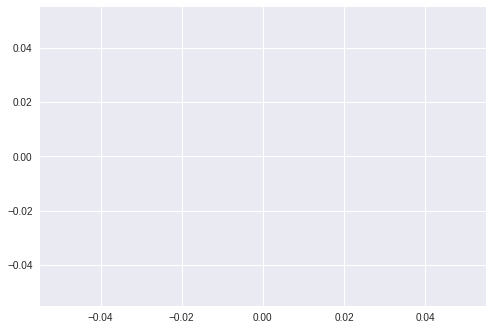

In [131]:
plt.plot(mse_history, 'r')
plt.show()

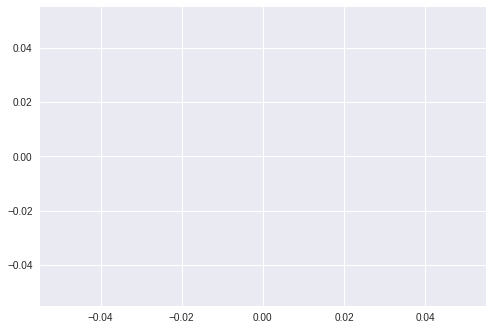

In [133]:
plt.plot(accuracy_history)
plt.show()

In [134]:
# print the final accuracy

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("test accuracy: ", (sess.run(accuracy, feed_dict={x:test_x, y_:test_y})))

NameError: ignored

In [135]:
# print the final mean square error

pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

NameError: ignored